In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil import parser
import math
import requests
import json
from scipy import signal

import resampy

pd.options.plotting.backend = "plotly"

%matplotlib inline

In [62]:
%run functions.ipynb

In [63]:
from_date = '2022-05-06T00:30:00'
to_date = '2022-05-06T23:59:00'

In [64]:
user_id = '1c4ca939-0ceb-4ac6-9faa-01c44804efb2'
# api_host = 'https://sci-api.appadem.in'
api_host = 'http://host.docker.internal:4000'

In [65]:
url = api_host + '/users/' + user_id + '/energy?from=' + from_date + '&to=' + to_date
response = requests.get(url).text
energy_raw = json.loads(response)
energy_raw[0]

{'t': '2022-05-06T04:26:00.000Z', 'still': False, 'energy': 1.7725839045653857}

In [66]:
rows = []
for d in energy_raw:
    rows.append([pd.to_datetime(d['t']), d['energy'], d['still']])

energy = pd.DataFrame(rows, columns=['time', 'energy', 'still']).set_index('time')


In [67]:
energy.mean()

energy    0.589044
still     0.624016
dtype: float64

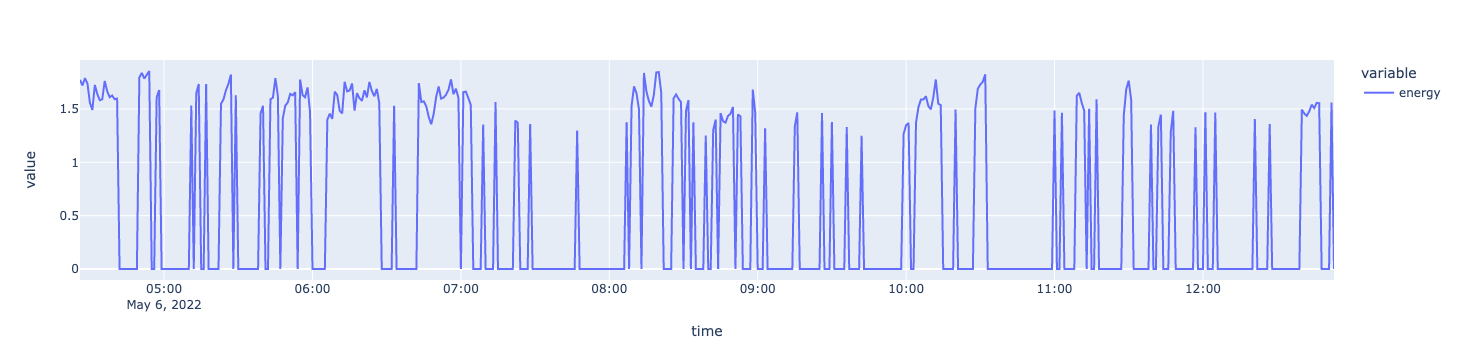

In [68]:
energy.plot(y=['energy'])

In [69]:
energy.sum()

energy    299.234552
still     317.000000
dtype: float64

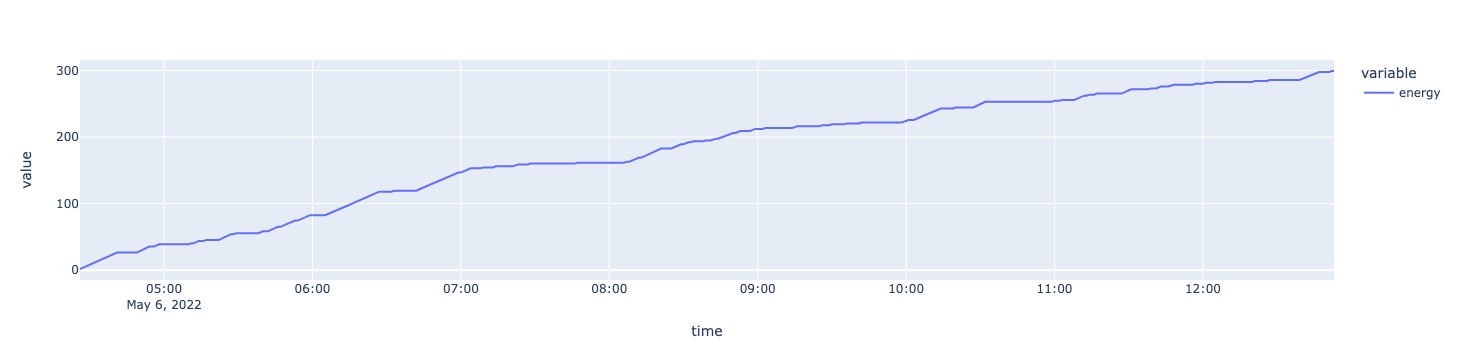

In [70]:
energy['energy'].cumsum().plot()

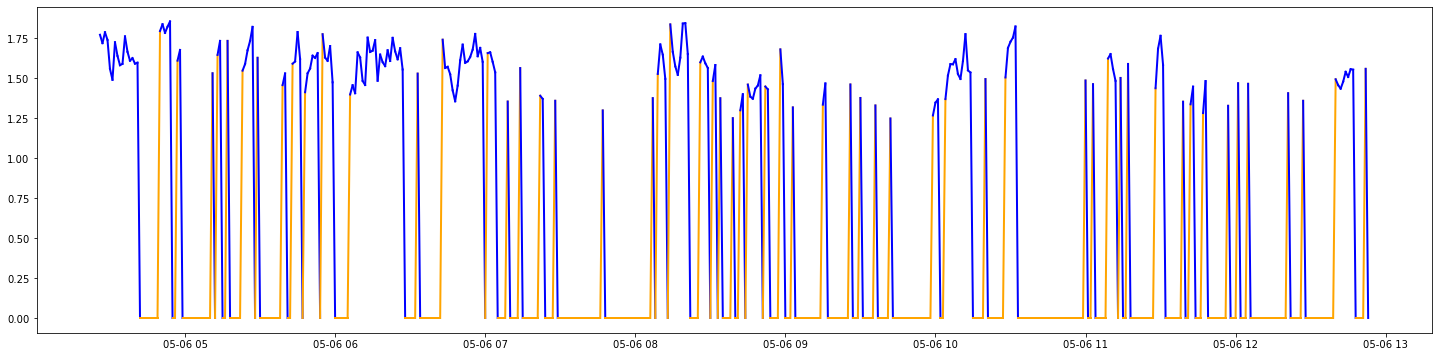

In [71]:
f, ax = plt.subplots(figsize=(25,6))

# energy = energy.cumsum()

for i in range(len(energy)-1):
    color = "orange" if energy.still.iat[i] else "blue";
    ax.plot([energy.index[i], energy.index[i+1]], [energy['energy'].iat[i], energy['energy'].iat[i+1]], color=color, linewidth=2)

# To remain consistent, the last point should be of the correct color. 
# Here, I changed the last point's group to 'a' for an example.
# ax.plot([data.index[-1]]*2, [data['value'].iat[-1]]*2, color=f'C{data.group.cat.codes.iat[-1]}', linewidth=2, marker='o')    

#legend_lines = [Line2D([0], [0], color=f'C{code}', lw=2) for code in data['group'].unique().codes]
#legend_labels = [g for g in data['group'].unique()]
# plt.legend(legend_lines, legend_labels, title='group')
plt.show()